In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tqdm

# 1. Linear congruential random generator

LCG (Linear Congruential Generator) is one of the simple PRNGs (Pseudo Random Number Generators)

\begin{equation}
    x'=ax + c \mod m
\end{equation}

Here, $a$, $c$, and $m$ are integer constants and $x$ is an integer variable. Given a value for $x$, this equation takes that value and turns it into a new inter value $x'$.

(a) Briefly explain how LCG works.

A Linear Congruential Generator, LCG, is a simple algorithm that produces a sequence of numbers using a recurrence relation of the form $x_{n+1}=(ax_n + c)\operatorname{mod} m$. It generates numbers that appear random because the modular operation and sufficiently good parameters create a sequence with a long non-repeating cycle and uniform distribution.

(b) Construct LCG for $a = 89$, $c = 0$, and $m = 101$ and plot $100$ numbers on a graph ($y$ axis is the generated values, $x$ axis is iterations).

In [2]:
def LCG(num, seed, a, c, m):
    rands = np.empty((num,), dtype=np.int64)
    rands[0] = (a * seed + c) % m
    for i in range(1, num):
        rands[i] = (a * rands[i - 1] + c) % m
    return rands

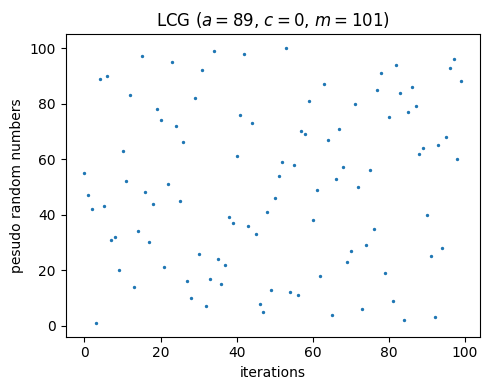

In [3]:
a = 89
c = 0
m = 101
seed = 414895

N = 100
iters = np.arange(N)
rands = LCG(N, seed, a, c, m)

plt.figure(figsize=(5, 4))
plt.scatter(iters, rands, s=2)
plt.title("LCG ($a=89$, $c=0$, $m=101$)")
plt.xlabel("iterations")
plt.ylabel("pesudo random numbers")
plt.tight_layout()
plt.show()

(c) Based on the LCG in (b), now plot $1000$ numbers on a graph. What can you see? 

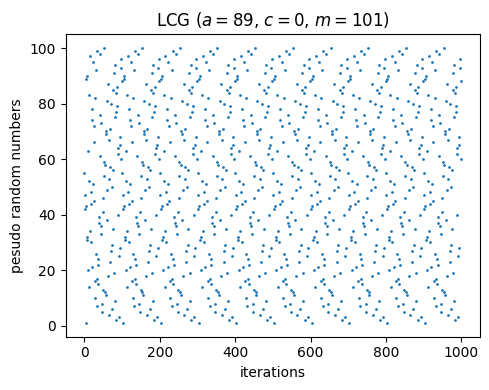

In [4]:
N = 1000
iters = np.arange(N)
rands = LCG(N, seed, a, c, m)

plt.figure(figsize=(5, 4))
plt.scatter(iters, rands, s=1)
plt.title("LCG ($a=89$, $c=0$, $m=101$)")
plt.xlabel("iterations")
plt.ylabel("pesudo random numbers")
plt.tight_layout()
plt.show()

(d) Construct LCG for $a = 1,664,525$, $c = 1,013,904,223$, and $m = 4,294,967,296$ and plot $1000$ numbers on a graph.

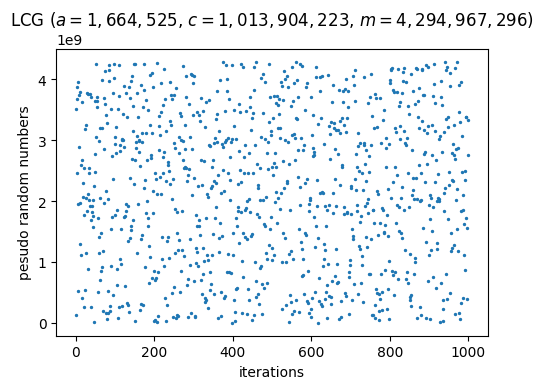

In [5]:
a = 1_664_525
c = 1_013_904_223
m = 4_294_967_296
seed = 414895

N = 1000
iters = np.arange(N)
rands = LCG(N, seed, a, c, m)

plt.figure(figsize=(5, 4))
plt.scatter(iters, rands, s=2)
plt.title("LCG ($a=1,664,525$, $c=1,013,904,223$, $m=4,294,967,296$)")
plt.xlabel("iterations")
plt.ylabel("pesudo random numbers")
plt.tight_layout()
plt.show()

(e) One of the well-known poor LCG is ***RANDU***. You can see when you draw the generated points on a 3D space, they lie on a series of parallel planes. Construct RANDU: $a$ is $65539$, $c$ is $0$ and $m$ is $2^{31}$. Make a 1D generated $1,000$ values, then normalize the array between $0$ and $1$. 

In [ ]:
a = 65539
c = 0
m = 2 ** 31
seed = 414895

N = 1000
rands = LCG(N, seed, a, c, m) / m
rands.mean(), rands.std() # 1/2, 1/√12 = 0.288...

(np.float64(0.5045027058757842), np.float64(0.2919464863622941))

(f) With the 1D array from (d), let’s say `[x0, x1, x2, x3, … ,x999]`, we will make triplets with the relation: `[xn, xx+1, xn+2]`. This will be the 3D points of generated values from RANDU. For more example, if the 1D array is `[1,2,3,4,5,6,7,8,9]`, you will get 7 3D points `[1,2,3]`, `[2,3,4]`, …, `[7,8,9]`. Generate 3D points and plot! What you can see? 

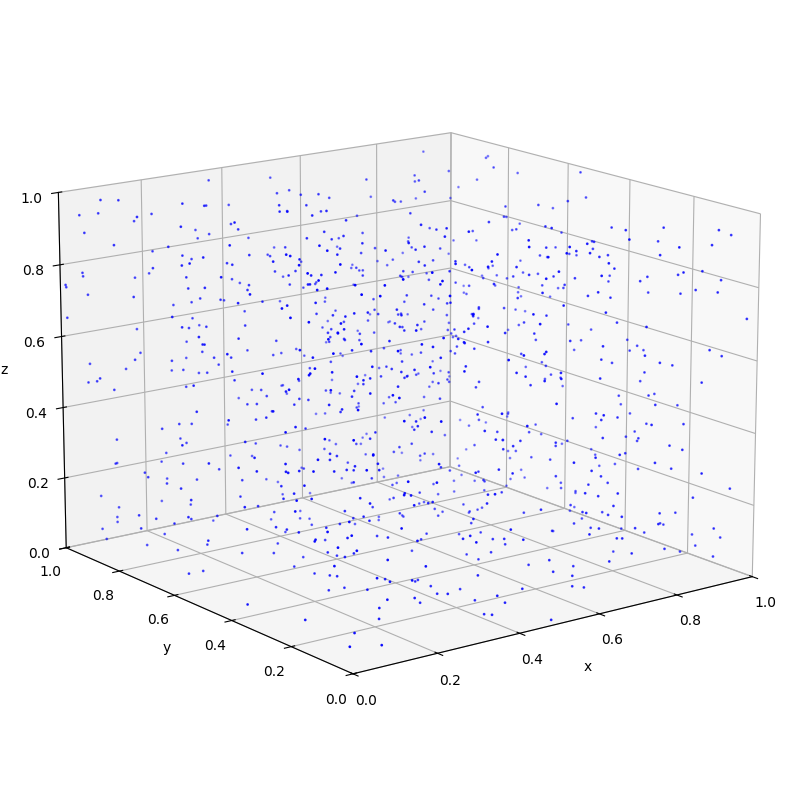

In [14]:
x = rands[:-2]
y = rands[1:-1]
z = rands[2:]

fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, s=1, c='b')

ax.view_init(elev=15, azim=-127)
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_zlim(0, 1)

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")

plt.tight_layout()
plt.show()

(g) increase number of the points to $100,000$ and plot. What number of planes you can observe? The answer is $15$. Theoretically with $m = 2^{31}$, the maximum number of plans is $1290$. But RANDU has only $15$ – numbers are highly correlated, very-poor as a random. 

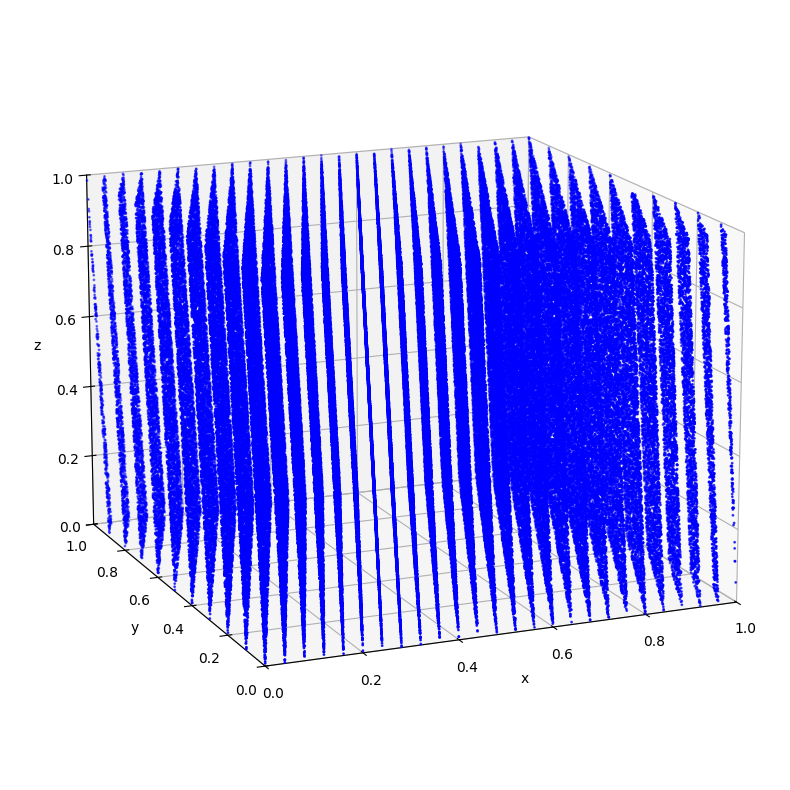

In [21]:
N = 200_000
rands = LCG(N, seed, a, c, m) / m
x = rands[:-2]
y = rands[1:-1]
z = rands[2:]

fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, s=1, c='b')

ax.view_init(elev=15, azim=-113)
# ax.view_init(elev=15, azim=-127)
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_zlim(0, 1)

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")

plt.tight_layout()
plt.show()

# 2. Monte-Carlo Integration

compute $f(x) = \sin^2\left[\dfrac{1}{x(2-x)}\right]$ over $(0, 2)$ using

In [9]:
def f(x):
    return (np.sin(1 / (x * (2 - x)))) ** 2

epsilon = 1e-6
a = 0 + epsilon
b = 2 - epsilon

N = np.arange(10**2, 10**6 + 1, 10**2, dtype=np.int64)

(a) Trapezoidal rule

In [10]:
def trapezoidal(f, a, b, N):
    dx = (b - a) / N
    x = np.linspace(a, b, N + 1)
    y = f(x)
    return dx / 2 * (y[0] + y[-1] + 2 * np.sum(y[1:-1]))

trape = [trapezoidal(f, a, b, n) for n in tqdm.tqdm(N)]

100%|██████████| 10000/10000 [01:36<00:00, 103.75it/s]


(b) Simpon’s rule

In [11]:
def simpson(f, a, b, N):
    dx = (b - a) / N
    x = np.linspace(a, b, N + 1)
    y = f(x)
    return dx / 3 * (y[0] + y[-1] + 4 * np.sum(y[1:-1:2]) + 2 * np.sum(y[2:-1:2]))

simp = [simpson(f, a, b, n) for n in tqdm.tqdm(N)]

100%|██████████| 10000/10000 [01:55<00:00, 86.21it/s]


c) Monte Carlo method for $N$ ($10^2$ to $10^6$) and plot how numeric errors of these approaches behave

\begin{equation}
    \int_a^b f(x)\, dx = \int_a^b \frac{f(x)}{p(x)} p(x)\, dx = \mathbb E_{x\sim p}[f(x)/p(x)]
\end{equation}

In [12]:
def montecarlo(f, a, b, N):
    P = 1 / (b - a)
    x = np.random.uniform(a, b, (N,))
    y = f(x)
    return np.mean(y) / P
    
mc = [montecarlo(f, a, b, n) for n in tqdm.tqdm(N)]

100%|██████████| 10000/10000 [02:27<00:00, 67.67it/s]


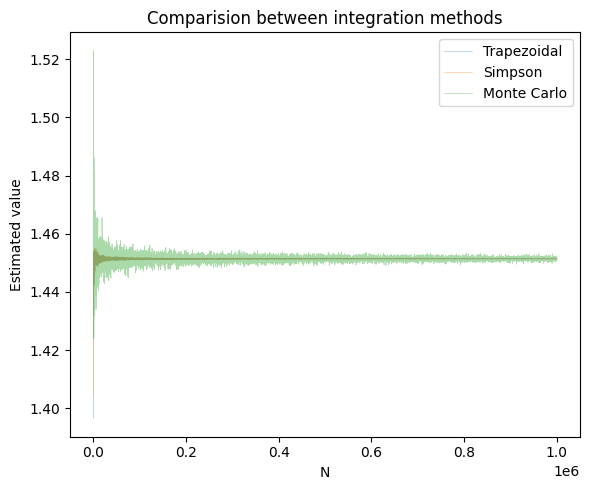

In [16]:
plt.figure(figsize=(6, 5))
plt.plot(N, trape, linewidth=0.5, alpha=0.4, label="Trapezoidal")
plt.plot(N, simp, linewidth=0.5, alpha=0.4, label="Simpson")
plt.plot(N, mc, linewidth=0.5, alpha=0.4, label="Monte Carlo")
plt.title("Comparision between integration methods")
plt.xlabel("N")
plt.ylabel("Estimated value")
plt.tight_layout()
plt.legend()
plt.show()

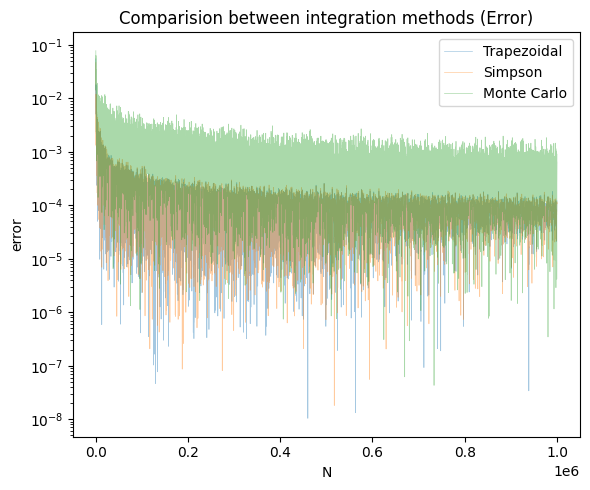

In [ ]:
exact = float.fromhex('0x1.738aa0e27582ap+0') # FP64 precision limit
plt.figure(figsize=(6, 5))
plt.plot(N, np.abs(exact - np.array(trape)), linewidth=0.5, alpha=0.4, label="Trapezoidal")
plt.plot(N, np.abs(exact - np.array(simp)), linewidth=0.5, alpha=0.4, label="Simpson")
plt.plot(N, np.abs(exact - np.array(mc)), linewidth=0.5, alpha=0.4, label="Monte Carlo")
plt.title("Comparision between integration methods (Error)")
plt.xlabel("N")
plt.ylabel("error")
plt.yscale("log")
plt.tight_layout()
plt.legend()
plt.show()

# 3. Integrals in many dimensions

Calculate volume of an unit hypersphere in (a) 2D, (b) 3D, and (c) plot the estimated volume of unit hypersphere 2D to 20D. (d) compare the plot with exact formula (gamma function will be helpful)

- Hyperball Volume
\begin{equation}
    V_n=\frac{\pi^{n/2}}{\Gamma(n / 2 + 1)}
\end{equation}

In [15]:
from scipy.special import gamma

def vol_exact(d):
    return (np.pi ** (d / 2)) / (gamma(d / 2 + 1))

(vol_exact(1), 2), (vol_exact(2), np.pi), (vol_exact(3), (4/3) * np.pi)

((np.float64(2.0), 2),
 (np.float64(3.141592653589793), 3.141592653589793),
 (np.float64(4.188790204786391), 4.1887902047863905))

In [16]:
def vol_mc(d, num_samples):
    x = np.random.uniform(0, 1, (num_samples, d))
    r = np.linalg.norm(x, axis=1)
    freq = np.sum(r < 1) / num_samples
    return (2. ** d) * freq
 
(vol_mc(1, 2**16), 2), (vol_mc(2, 2**16), np.pi), (vol_mc(3, 2**16), (4/3) * np.pi)

((np.float64(2.0), 2),
 (np.float64(3.13592529296875), 3.141592653589793),
 (np.float64(4.1939697265625), 4.1887902047863905))

(a) 2D

100%|██████████| 10000/10000 [03:00<00:00, 55.39it/s]


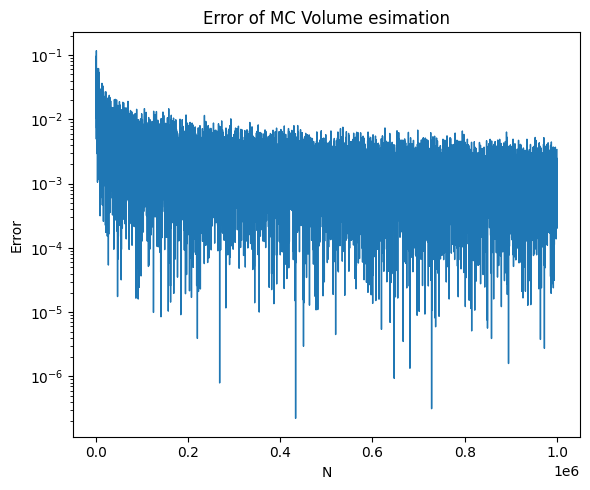

In [17]:
mc = np.array([vol_mc(2, n) for n in tqdm.tqdm(N)])
exact = vol_exact(2)


plt.figure(figsize=(6, 5))
plt.plot(N, np.abs(exact - mc), linewidth=1)
plt.title("Error of MC Volume esimation")
plt.xlabel("N")
plt.ylabel("Error")
plt.yscale("log")
plt.tight_layout()
plt.show()

(b) 3D

100%|██████████| 10000/10000 [05:06<00:00, 32.66it/s]


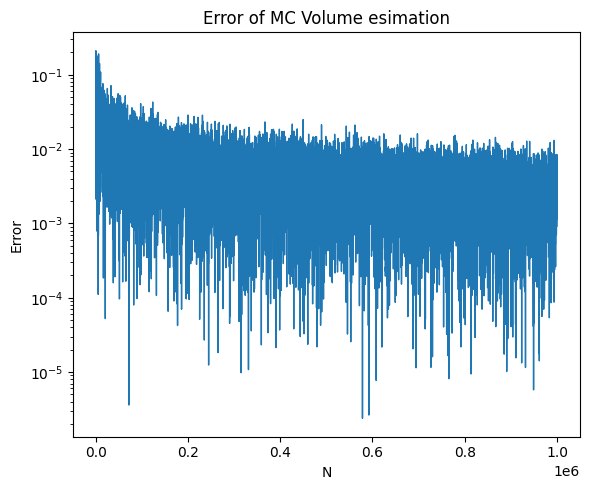

In [18]:
mc = np.array([vol_mc(3, n) for n in tqdm.tqdm(N)])
exact = vol_exact(3)


plt.figure(figsize=(6, 5))
plt.plot(N, np.abs(exact - mc), linewidth=1)
plt.title("Error of MC Volume esimation")
plt.xlabel("N")
plt.ylabel("Error")
plt.yscale("log")
plt.tight_layout()
plt.show()

(c) 2D - 20D

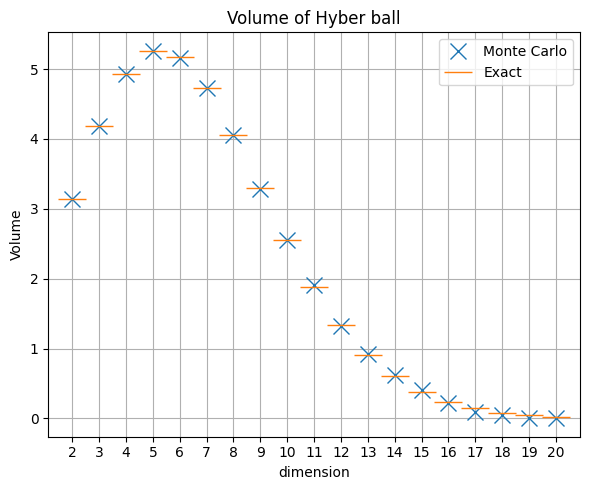

In [19]:
dims = list(range(2, 20 + 1))
mc = np.array([vol_mc(dim, 10_000_000) for dim in dims])
exact = np.array([vol_exact(dim) for dim in dims])


plt.figure(figsize=(6, 5))

plt.plot(dims, mc,
         marker='x',
         linestyle='None',
         markersize=12,
         label="Monte Carlo")

plt.plot(dims, exact,
         marker='_',
         linestyle='None',
         markersize=20,
         label="Exact")

plt.title("Volume of Hyber ball")
plt.xticks(dims)
plt.xlabel("dimension")
plt.ylabel("Volume")
plt.tight_layout()
plt.legend()
plt.grid()
plt.show()